# Exploration:

The purpose of this script is to figure out to what extent Apta-MCTS generates the same proposed aptamer structures using the same input information. To begin, read in the 10 csv files, corresponding to 5 trials each of the program. The code which generated these files is:

cd Apta-MCTS-beta/
cd src

python apta_mcts.py -i 'project_sequences/bPrP.fasta' -k 100 -bp 15 -n 100 -s 'score_functions/rf-ictf-li2014/mcc0.484-ppv1.000-acc0.822-sn0.290-sp1.000-npv0.809-yd0.290-35trees' -o './project_sequences/det_test/1st_run' -fwd 'AACCGGTT' -bwd 'TTGGCCAA'

python apta_mcts.py -i 'project_sequences/bPrP.fasta' -k 100 -bp 15 -n 100 -s 'score_functions/rf-ictf-li2014/mcc0.484-ppv1.000-acc0.822-sn0.290-sp1.000-npv0.809-yd0.290-35trees' -o './project_sequences/det_test/2nd_run' -fwd 'AACCGGTT' -bwd 'TTGGCCAA'

python apta_mcts.py -i 'project_sequences/bPrP.fasta' -k 100 -bp 15 -n 100 -s 'score_functions/rf-ictf-li2014/mcc0.484-ppv1.000-acc0.822-sn0.290-sp1.000-npv0.809-yd0.290-35trees' -o './project_sequences/det_test/3rd_run' -fwd 'AACCGGTT' -bwd 'TTGGCCAA'

python apta_mcts.py -i 'project_sequences/bPrP.fasta' -k 100 -bp 15 -n 100 -s 'score_functions/rf-ictf-li2014/mcc0.484-ppv1.000-acc0.822-sn0.290-sp1.000-npv0.809-yd0.290-35trees' -o './project_sequences/det_test/4th_run' -fwd 'AACCGGTT' -bwd 'TTGGCCAA'

python apta_mcts.py -i 'project_sequences/bPrP.fasta' -k 100 -bp 15 -n 100 -s 'score_functions/rf-ictf-li2014/mcc0.484-ppv1.000-acc0.822-sn0.290-sp1.000-npv0.809-yd0.290-35trees' -o './project_sequences/det_test/5th_run' -fwd 'AACCGGTT' -bwd 'TTGGCCAA'

To begin, place the 10 csv files under files, and observe the naming convention. I'm assuming them to be:

1. Exp_1_1.csv
2. Exp_1_16.csv
3. Exp_2_1.csv
4. Exp_2_16.csv
5. Exp_3_1.csv
6. Exp_3_16.csv
7. Exp_4_1.csv
8. Exp_4_16.csv
9. Exp_5_1.csv
10. Exp_5_16.csv

In [ ]:
#From StackExchange
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

Saving Exp_1_1.csv to Exp_1_1 (3).csv
Saving Exp_1_16.csv to Exp_1_16 (3).csv
Saving Exp_2_1.csv to Exp_2_1 (3).csv
Saving Exp_2_16.csv to Exp_2_16 (3).csv
Saving Exp_3_1.csv to Exp_3_1 (3).csv
Saving Exp_3_16.csv to Exp_3_16 (3).csv
Saving Exp_4_1.csv to Exp_4_1 (3).csv
Saving Exp_4_16.csv to Exp_4_16 (3).csv
Saving Exp_5_1.csv to Exp_5_1 (3).csv
Saving Exp_5_16.csv to Exp_5_16 (3).csv


In [ ]:
import pandas as pd

# File Exploration:

In [ ]:
test = pd.read_csv('Exp_5_16.csv', delimiter=',', encoding_errors = 'replace')
test

,aptamer_protein_interaction_score,primary_sequence,secondary_structure,minimum_free_energy
0,0.428571,AACCGGTTGUCGGCUGGGGUAAUTTGGCCAA,..((((((...))))))(((......)))..,-7.9
1,0.400000,AACCGGTTACACAUUCGAAUUAUTTGGCCAA,....(((((...............)))))..,-2.1
2,0.400000,AACCGGTTGACACAUUCGAAUUATTGGCCAA,....((((((.............))))))..,-2.1
3,0.400000,AACCGGTTACACAUUCGAAUUAATTGGCCAA,..(((((((...........)))))))....,-3.5
4,0.400000,AACCGGTTCCACAUUCGAAUUAATTGGCCAA,..((((((.............))))))....,-1.8
...,...,...,...,...
95,0.342857,AACCGGTTCAAUUCGAAUUAUCGTTGGCCAA,....(((.(((..(((....)))))))))..,-4.2
96,0.342857,AACCGGTTUUAUUCGAAUUAGGUTTGGCCAA,....((((....((......))...))))..,-3.3
97,0.342857,AACCGGTTAAUUCGAAUUAUUUCTTGGCCAA,....((((((...(((....)))))))))..,-4.9
98,0.342857,AACCGGTTACAUUCGAAUUAGUUTTGGCCAA,....(((((....(......)...)))))..,-2.9


In [ ]:
test['primary_sequence']

0     AACCGGTTGUCGGCUGGGGUAAUTTGGCCAA
1     AACCGGTTACACAUUCGAAUUAUTTGGCCAA
2     AACCGGTTGACACAUUCGAAUUATTGGCCAA
3     AACCGGTTACACAUUCGAAUUAATTGGCCAA
4     AACCGGTTCCACAUUCGAAUUAATTGGCCAA
                   ...               
95    AACCGGTTCAAUUCGAAUUAUCGTTGGCCAA
96    AACCGGTTUUAUUCGAAUUAGGUTTGGCCAA
97    AACCGGTTAAUUCGAAUUAUUUCTTGGCCAA
98    AACCGGTTACAUUCGAAUUAGUUTTGGCCAA
99    AACCGGTTCAAGAUUCGAAUUAUTTGGCCAA
Name: primary_sequence, Length: 100, dtype: object

Check for duplicate aptamers in the output:

In [ ]:
test_set = set(test['primary_sequence'])
print (len(test_set))
#No duplicate sequences.

100


The specific utility of pandas, here, is that is easily allows for manipulation of columns.

In [ ]:
test['primary_sequence'].values

array(['AACCGGTTGUCGGCUGGGGUAAUTTGGCCAA',
       'AACCGGTTACACAUUCGAAUUAUTTGGCCAA',
       'AACCGGTTGACACAUUCGAAUUATTGGCCAA',
       'AACCGGTTACACAUUCGAAUUAATTGGCCAA',
       'AACCGGTTCCACAUUCGAAUUAATTGGCCAA',
       'AACCGGTTAGGGGAUUCGAAUUUTTGGCCAA',
       'AACCGGTTCACAUUCGAAUUAACTTGGCCAA',
       'AACCGGTTCACACAUUCGAAUUATTGGCCAA',
       'AACCGGTTCACAUUCGAAUUAAGTTGGCCAA',
       'AACCGGTTUGGAUUCGAAUUUAATTGGCCAA',
       'AACCGGTTCACAUUCGAAUUAAUTTGGCCAA',
       'AACCGGTTUCACAUUCGAAUUAATTGGCCAA',
       'AACCGGTTGGAAUUCGAAUAUCUTTGGCCAA',
       'AACCGGTTGCAACAUUCGAAUUATTGGCCAA',
       'AACCGGTTGAGCAGGGAAUUCGGTTGGCCAA',
       'AACCGGTTGGGAAUAUUCGAAUUTTGGCCAA',
       'AACCGGTTAAUUCGAAUUAUGGCTTGGCCAA',
       'AACCGGTTACAUUCGAAUUAAGUTTGGCCAA',
       'AACCGGTTAAUUCGAAUUCGCGUTTGGCCAA',
       'AACCGGTTGUAGGGAAUUCGAGCTTGGCCAA',
       'AACCGGTTGGAAUUCGAAUUCCATTGGCCAA',
       'AACCGGTTGAAAUUCGAAUUAGCTTGGCCAA',
       'AACCGGTTCAAUUCGAAUUUAUCTTGGCCAA',
       'AACCGGTTUAUUCGAAUUCACAUTTG

Note that each of these files are not all of the candidates generated for each run, but the top k = 100 by Aptamer-Protein Interaction score. The number of candidates generated also varies significantly by run.

In [ ]:
for entry in test.values:
  print (entry)
  print()

[0.4285714285714285 'AACCGGTTGUCGGCUGGGGUAAUTTGGCCAA'
 '..((((((...))))))(((......)))..' -7.900000095367432]

[0.4 'AACCGGTTACACAUUCGAAUUAUTTGGCCAA' '....(((((...............)))))..'
 -2.0999999046325684]

[0.4 'AACCGGTTGACACAUUCGAAUUATTGGCCAA' '....((((((.............))))))..'
 -2.0999999046325684]

[0.4 'AACCGGTTACACAUUCGAAUUAATTGGCCAA' '..(((((((...........)))))))....'
 -3.5]

[0.4 'AACCGGTTCCACAUUCGAAUUAATTGGCCAA' '..((((((.............))))))....'
 -1.7999999523162842]

[0.4 'AACCGGTTAGGGGAUUCGAAUUUTTGGCCAA' '....(((((((((.......)))))))))..'
 -4.699999809265137]

[0.4 'AACCGGTTCACAUUCGAAUUAACTTGGCCAA' '....(((((......)))))...........'
 -1.600000023841858]

[0.4 'AACCGGTTCACACAUUCGAAUUATTGGCCAA' '..(((((((........))))...)))....'
 -2.299999952316284]

[0.4 'AACCGGTTCACAUUCGAAUUAAGTTGGCCAA' '....((((.((...........)).))))..'
 -3.0]

[0.4 'AACCGGTTUGGAUUCGAAUUUAATTGGCCAA' '..((((((.((((....))))))))))....'
 -3.299999952316284]

[0.4 'AACCGGTTCACAUUCGAAUUAAUTTGGCCAA' '....(((.((.(((......

In [ ]:
#The empty output table.
fin_output = pd.DataFrame(columns=['aptamer_protein_interaction_score','primary_sequence','secondary_structure','minimum_free_energy', 'count'])
fin_output

,aptamer_protein_interaction_score,primary_sequence,secondary_structure,minimum_free_energy,count


In [ ]:
entry = test.values[0]
print(entry)
print(entry[1])

[0.4285714285714285 'AACCGGTTGUCGGCUGGGGUAAUTTGGCCAA'
 '..((((((...))))))(((......)))..' -7.900000095367432]
AACCGGTTGUCGGCUGGGGUAAUTTGGCCAA


In [ ]:
flag = entry[1] in fin_output['primary_sequence'].values
print(flag)

False


In [ ]:
#entry.append(0)
entry = list(entry)
entry.append(1)
entry

[0.4285714285714285,
 'AACCGGTTGUCGGCUGGGGUAAUTTGGCCAA',
 '..((((((...))))))(((......)))..',
 -7.900000095367432,
 1]

In [ ]:
#Append the entry to the end of the output dataframe.
fin_output.loc[len(fin_output.index)] = entry
fin_output

,aptamer_protein_interaction_score,primary_sequence,secondary_structure,minimum_free_energy,count
0,0.428571,AACCGGTTGUCGGCUGGGGUAAUTTGGCCAA,..((((((...))))))(((......)))..,-7.9,1


In [ ]:
#A simple function to determine whether the sequence is already in the
#set of "counted" sequences, and to add it, if not.
def simple_count(entry, fin_output):
  flag = entry[1] in fin_output['primary_sequence'].values
  if flag == False:
    entry = list(entry)
    entry.append(1)
    fin_output.loc[len(fin_output.index)] = entry
  else:
    fin_output = 'Its already there...'
  return fin_output

In [ ]:
#Reset the two inputs to our function:
fin_output = pd.DataFrame(columns=['aptamer_protein_interaction_score','primary_sequence','secondary_structure','minimum_free_energy', 'count'])
entry = test.values[0]

#And, test:
simple_count(entry, fin_output)


,aptamer_protein_interaction_score,primary_sequence,secondary_structure,minimum_free_energy,count
0,0.428571,AACCGGTTGUCGGCUGGGGUAAUTTGGCCAA,..((((((...))))))(((......)))..,-7.9,1


In [ ]:
#Now to modify the function that it updates the counter:
def simple_count(entry, fin_output):
  flag = entry[1] in fin_output['primary_sequence'].values
  if flag == False:
    entry = list(entry)
    entry.append(1)
    fin_output.loc[len(fin_output.index)] = entry
  else:
    #Pandas doesn't seem to appreciate the user changing a singing value in an entry,
    #hence, the necessity of modifying and replacing the whole row.
    update = fin_output.loc[fin_output['primary_sequence'] == entry[1]]
    update = update.values[0]
    update[4] += 1
    fin_output.loc[fin_output['primary_sequence'] == entry[1]] = update
  return fin_output

In [ ]:
#Intentionally reset only the first input:
entry = test.values[0]

#And, test:
simple_count(entry, fin_output)


,aptamer_protein_interaction_score,primary_sequence,secondary_structure,minimum_free_energy,count
0,0.428571,AACCGGTTGUCGGCUGGGGUAAUTTGGCCAA,..((((((...))))))(((......)))..,-7.9,2


Looks good! -- Finally, in order to be genuinely useful, simple_count needs to be built out into a function that takes a list of .csv files, and performs simple_count on all values in each, sequentially.

In [ ]:
def csv_count(file, fin_output):
 inp = pd.read_csv(file, delimiter=',', encoding_errors = 'replace')
 inp = inp.values
 for entry in inp:
  #print (entry)
  #print()
  simple_count(entry,fin_output)
 return fin_output

In [ ]:
print(entry)

[0.4285714285714285 'AACCGGTTGUCGGCUGGGGUAAUTTGGCCAA'
 '..((((((...))))))(((......)))..' -7.900000095367432]


In [ ]:
#Reset input:
fin_output = pd.DataFrame(columns=['aptamer_protein_interaction_score','primary_sequence','secondary_structure','minimum_free_energy', 'count'])

#And test:
csv_count('Exp_5_16.csv', fin_output)

,aptamer_protein_interaction_score,primary_sequence,secondary_structure,minimum_free_energy,count
0,0.428571,AACCGGTTGUCGGCUGGGGUAAUTTGGCCAA,..((((((...))))))(((......)))..,-7.9,1
1,0.400000,AACCGGTTACACAUUCGAAUUAUTTGGCCAA,....(((((...............)))))..,-2.1,1
2,0.400000,AACCGGTTGACACAUUCGAAUUATTGGCCAA,....((((((.............))))))..,-2.1,1
3,0.400000,AACCGGTTACACAUUCGAAUUAATTGGCCAA,..(((((((...........)))))))....,-3.5,1
4,0.400000,AACCGGTTCCACAUUCGAAUUAATTGGCCAA,..((((((.............))))))....,-1.8,1
...,...,...,...,...,...
95,0.342857,AACCGGTTCAAUUCGAAUUAUCGTTGGCCAA,....(((.(((..(((....)))))))))..,-4.2,1
96,0.342857,AACCGGTTUUAUUCGAAUUAGGUTTGGCCAA,....((((....((......))...))))..,-3.3,1
97,0.342857,AACCGGTTAAUUCGAAUUAUUUCTTGGCCAA,....((((((...(((....)))))))))..,-4.9,1
98,0.342857,AACCGGTTACAUUCGAAUUAGUUTTGGCCAA,....(((((....(......)...)))))..,-2.9,1


It seems to behave normally. As expected, there are no duplicated aptamers in the sequence. Finally, to write one more function which summarizes the results of a number of trials.

In [ ]:
def mult_csv_count(file_list):
  if len(file_list)<2:
    print("It breaks if given less than two files. Please use 'csv_count'")
  #Reset input(every-time):
  fin_output = pd.DataFrame(columns=['aptamer_protein_interaction_score','primary_sequence','secondary_structure','minimum_free_energy', 'count'])
  for file in file_list:
    csv_count(file, fin_output)
  return fin_output


In [ ]:
#Test!
mult_csv_count(('Exp_5_16.csv','Exp_5_16.csv'))

,aptamer_protein_interaction_score,primary_sequence,secondary_structure,minimum_free_energy,count
0,0.428571,AACCGGTTGUCGGCUGGGGUAAUTTGGCCAA,..((((((...))))))(((......)))..,-7.9,2
1,0.400000,AACCGGTTACACAUUCGAAUUAUTTGGCCAA,....(((((...............)))))..,-2.1,2
2,0.400000,AACCGGTTGACACAUUCGAAUUATTGGCCAA,....((((((.............))))))..,-2.1,2
3,0.400000,AACCGGTTACACAUUCGAAUUAATTGGCCAA,..(((((((...........)))))))....,-3.5,2
4,0.400000,AACCGGTTCCACAUUCGAAUUAATTGGCCAA,..((((((.............))))))....,-1.8,2
...,...,...,...,...,...
95,0.342857,AACCGGTTCAAUUCGAAUUAUCGTTGGCCAA,....(((.(((..(((....)))))))))..,-4.2,2
96,0.342857,AACCGGTTUUAUUCGAAUUAGGUTTGGCCAA,....((((....((......))...))))..,-3.3,2
97,0.342857,AACCGGTTAAUUCGAAUUAUUUCTTGGCCAA,....((((((...(((....)))))))))..,-4.9,2
98,0.342857,AACCGGTTACAUUCGAAUUAGUUTTGGCCAA,....(((((....(......)...)))))..,-2.9,2


It seems to work as expected, given that there should be exactly two of every sequence. Very good performance speed, too. Now proceed to actual use:

# Testing:

## Define functions:

In [ ]:
def simple_count(entry, fin_output):
  flag = entry[1] in fin_output['primary_sequence'].values
  if flag == False:
    entry = list(entry)
    entry.append(1)
    fin_output.loc[len(fin_output.index)] = entry
  else:
    #Pandas doesn't seem to appreciate the user changing a singing value in an entry,
    #hence, the necessity of modifying and replacing the whole row.
    update = fin_output.loc[fin_output['primary_sequence'] == entry[1]]
    update = update.values[0]
    update[4] += 1
    fin_output.loc[fin_output['primary_sequence'] == entry[1]] = update
  return fin_output

In [ ]:
def csv_count(file, fin_output):
 inp = pd.read_csv(file, delimiter=',', encoding_errors = 'replace')
 inp = inp.values
 for entry in inp:
  #print (entry)
  #print()
  simple_count(entry,fin_output)
 return fin_output

In [ ]:
def mult_csv_count(file_list):
  if len(file_list)<2:
    print("It breaks if given less than two files. Please use 'csv_count'")
  #Reset input(every-time):
  fin_output = pd.DataFrame(columns=['aptamer_protein_interaction_score','primary_sequence','secondary_structure','minimum_free_energy', 'count'])
  for file in file_list:
    csv_count(file, fin_output)
  return fin_output

## Questions:

Is there any overlap in sequences generated in multiple "runs" of the program, using the same parameters?

In [ ]:
mult_csv_count(('Exp_1_1.csv','Exp_2_1.csv', 'Exp_3_1.csv', 'Exp_4_1.csv', 'Exp_5_1.csv'))

,aptamer_protein_interaction_score,primary_sequence,secondary_structure,minimum_free_energy,count
0,0.400000,AACCGGTTUAAAUAAUUUACGUUTTGGCCAA,....((((.((((.......)))).))))..,-3.4,1
1,0.400000,AACCGGTTAAUUAAUUUACGUGGTTGGCCAA,....(((((((((.......)))))))))..,-6.9,1
2,0.400000,AACCGGTTAAUAAUUUACGCUAATTGGCCAA,....(((((((...........)))))))..,-4.7,1
3,0.400000,AACCGGTTCAAAUAAUUUACGUUTTGGCCAA,....(((.((((..........)))))))..,-3.6,1
4,0.400000,AACCGGTTCUGUAAUUUACGUGGTTGGCCAA,(((((((..........)).)))))......,-2.9,1
...,...,...,...,...,...
495,0.371429,AACCGGTTCUAUAUGUGGUUGAGTTGGCCAA,..(((((((...........)))))))....,-3.5,1
496,0.371429,AACCGGTTAGUGUGGUUGUUAGCTTGGCCAA,....((((((.((........))))))))..,-5.6,1
497,0.371429,AACCGGTTAGUUUAAUGGUUGCUTTGGCCAA,....((((((.............))))))..,-3.6,1
498,0.371429,AACCGGTTCUGGUGGGUAAUUGUTTGGCCAA,.((((....))))((.(((....))).))..,-6.1,1


The answer would appear to be... no.
Just to be safe:

In [ ]:
data = mult_csv_count(('Exp_1_1.csv','Exp_2_1.csv', 'Exp_3_1.csv', 'Exp_4_1.csv', 'Exp_5_1.csv'))
set_of_seqs = set(data['primary_sequence'])
len(set_of_seqs)

500

No duplicates. None.

**My interest was to try and correlate API Score or Minimum Free Energy with the number of repeats of a particular sequence. That would imply that Apta-MCTS does eventually converge, by arriving at the same sequence more than once. You would need to run it a number of times, and collate the outputs, which isn't really an issue, given how quickly the program runs.**

**But... the program, so far, does not generate ANY duplicate sequences. This shouldn't be too surprising, given that the search space for 15 base aptamers is 4^15 = ~1 Billion.**

# Exploration (Part 2)

Without changing very much, I regenerated output and performed the same tests, using a sequence legnth of 8 bp, no tags, and 10 interations.

The rationale is that 4^8 = 65,000, where 4^15 = 1 Billion. By decreasing the search space, and increasing the number of iterations, I aimed to increase the likelihood of the program generating the same candidate aptamer, twice. In a later effort, I'll properly iterate in the bash script, so that a sensibly large number of trials can be done.

In [ ]:
#From StackExchange
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

Saving Exp_1.csv to Exp_1.csv
Saving Exp_2.csv to Exp_2.csv
Saving Exp_3.csv to Exp_3.csv
Saving Exp_4.csv to Exp_4.csv
Saving Exp_5.csv to Exp_5.csv
Saving Exp_6.csv to Exp_6.csv
Saving Exp_7.csv to Exp_7.csv
Saving Exp_8.csv to Exp_8.csv
Saving Exp_9.csv to Exp_9.csv
Saving Exp_10.csv to Exp_10.csv


# Testing:

## Define functions:

In [ ]:
#Incase you forget.
import pandas as pd

In [ ]:
def simple_count(entry, fin_output):
  flag = entry[1] in fin_output['primary_sequence'].values
  if flag == False:
    entry = list(entry)
    entry.append(1)
    fin_output.loc[len(fin_output.index)] = entry
  else:
    #Pandas doesn't seem to appreciate the user changing a singing value in an entry,
    #hence, the necessity of modifying and replacing the whole row.
    update = fin_output.loc[fin_output['primary_sequence'] == entry[1]]
    update = update.values[0]
    update[4] += 1
    fin_output.loc[fin_output['primary_sequence'] == entry[1]] = update
  return fin_output

In [ ]:
def csv_count(file, fin_output):
 inp = pd.read_csv(file, delimiter=',', encoding_errors = 'replace')
 inp = inp.values
 for entry in inp:
  #print (entry)
  #print()
  simple_count(entry,fin_output)
 return fin_output

In [ ]:
def mult_csv_count(file_list):
  if len(file_list)<2:
    print("It breaks if given less than two files. Please use 'csv_count'")
  #Reset input(every-time):
  fin_output = pd.DataFrame(columns=['aptamer_protein_interaction_score','primary_sequence','secondary_structure','minimum_free_energy', 'count'])
  for file in file_list:
    csv_count(file, fin_output)
  return fin_output

## Questions:

In [ ]:
# Is there any overlap in sequences generated in multiple "runs" of the program,
# using the same parameters?
mult_csv_count(('Exp_1.csv','Exp_2.csv', 'Exp_3.csv', 'Exp_4.csv', 'Exp_5.csv', 'Exp_6.csv','Exp_7.csv', 'Exp_8.csv', 'Exp_9.csv', 'Exp_10.csv'))

,aptamer_protein_interaction_score,primary_sequence,secondary_structure,minimum_free_energy,count
0,0.428571,UACAGCUA,........,0.0,1
1,0.457143,UUAUGGGC,........,0.0,1
2,0.228571,GGGGGACC,((....)),-0.2,1
3,0.428571,AAAGCUAA,........,0.0,1
4,0.485714,AUUAUGGA,........,0.0,1
5,0.485714,GUUAUGGC,........,0.0,1
6,0.457143,GCGUUUAG,........,0.0,1
7,0.485714,AUUAUGGG,........,0.0,1
8,0.457143,GCGUUUAA,........,0.0,1
9,0.428571,AAAUUUAC,........,0.0,1


The answer would appear to be... no.
Just to be safe:

In [ ]:
data = mult_csv_count(('Exp_1.csv','Exp_2.csv', 'Exp_3.csv', 'Exp_4.csv', 'Exp_5.csv', 'Exp_6.csv','Exp_7.csv', 'Exp_8.csv', 'Exp_9.csv', 'Exp_10.csv'))
set_of_seqs = set(data['primary_sequence'])
len(set_of_seqs)

11

No duplicates again.

# Let's try a different approach.

**I'm interested in correlating sequences based on their similarity, and then using these correlations to "commute" aptamer-protein interaction score. As a first step, correlation.**

Import the same files from the 1st test, in order to regenerate the list of all sequences:



In [ ]:
#From StackExchange
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

Saving Exp_1_1.csv to Exp_1_1.csv
Saving Exp_1_16.csv to Exp_1_16.csv
Saving Exp_2_1.csv to Exp_2_1.csv
Saving Exp_2_16.csv to Exp_2_16.csv
Saving Exp_3_1.csv to Exp_3_1.csv
Saving Exp_3_16.csv to Exp_3_16.csv
Saving Exp_4_1.csv to Exp_4_1.csv
Saving Exp_4_16.csv to Exp_4_16.csv
Saving Exp_5_1.csv to Exp_5_1.csv
Saving Exp_5_16.csv to Exp_5_16.csv


## Define functions:

In [ ]:
import pandas as pd

In [ ]:
def simple_count(entry, fin_output):
  flag = entry[1] in fin_output['primary_sequence'].values
  if flag == False:
    entry = list(entry)
    entry.append(1)
    fin_output.loc[len(fin_output.index)] = entry
  else:
    #Pandas doesn't seem to appreciate the user changing a singing value in an entry,
    #hence, the necessity of modifying and replacing the whole row.
    update = fin_output.loc[fin_output['primary_sequence'] == entry[1]]
    update = update.values[0]
    update[4] += 1
    fin_output.loc[fin_output['primary_sequence'] == entry[1]] = update
  return fin_output

In [ ]:
def csv_count(file, fin_output):
 inp = pd.read_csv(file, delimiter=',', encoding_errors = 'replace')
 inp = inp.values
 for entry in inp:
  #print (entry)
  #print()
  simple_count(entry,fin_output)
 return fin_output

In [ ]:
def mult_csv_count(file_list):
  if len(file_list)<2:
    print("It breaks if given less than two files. Please use 'csv_count'")
  #Reset input(every-time):
  fin_output = pd.DataFrame(columns=['aptamer_protein_interaction_score','primary_sequence','secondary_structure','minimum_free_energy', 'count'])
  for file in file_list:
    csv_count(file, fin_output)
  return fin_output

## Regenerate output:

In [ ]:
data = mult_csv_count(('Exp_1_1.csv','Exp_2_1.csv', 'Exp_3_1.csv', 'Exp_4_1.csv', 'Exp_5_1.csv'))
data

,aptamer_protein_interaction_score,primary_sequence,secondary_structure,minimum_free_energy,count
0,0.400000,AACCGGTTUAAAUAAUUUACGUUTTGGCCAA,....((((.((((.......)))).))))..,-3.4,1
1,0.400000,AACCGGTTAAUUAAUUUACGUGGTTGGCCAA,....(((((((((.......)))))))))..,-6.9,1
2,0.400000,AACCGGTTAAUAAUUUACGCUAATTGGCCAA,....(((((((...........)))))))..,-4.7,1
3,0.400000,AACCGGTTCAAAUAAUUUACGUUTTGGCCAA,....(((.((((..........)))))))..,-3.6,1
4,0.400000,AACCGGTTCUGUAAUUUACGUGGTTGGCCAA,(((((((..........)).)))))......,-2.9,1
...,...,...,...,...,...
495,0.371429,AACCGGTTCUAUAUGUGGUUGAGTTGGCCAA,..(((((((...........)))))))....,-3.5,1
496,0.371429,AACCGGTTAGUGUGGUUGUUAGCTTGGCCAA,....((((((.((........))))))))..,-5.6,1
497,0.371429,AACCGGTTAGUUUAAUGGUUGCUTTGGCCAA,....((((((.............))))))..,-3.6,1
498,0.371429,AACCGGTTCUGGUGGGUAAUUGUTTGGCCAA,.((((....))))((.(((....))).))..,-6.1,1


In [ ]:
o_seqs = data['primary_sequence'].values
o_seqs

array(['AACCGGTTUAAAUAAUUUACGUUTTGGCCAA',
       'AACCGGTTAAUUAAUUUACGUGGTTGGCCAA',
       'AACCGGTTAAUAAUUUACGCUAATTGGCCAA',
       'AACCGGTTCAAAUAAUUUACGUUTTGGCCAA',
       'AACCGGTTCUGUAAUUUACGUGGTTGGCCAA',
       'AACCGGTTAGUAAAUUUAAUCGUTTGGCCAA',
       'AACCGGTTUUAAUUAAUUUACGCTTGGCCAA',
       'AACCGGTTAAAGUUAAUUUACGGTTGGCCAA',
       'AACCGGTTAAAUUAAUUUACGCGTTGGCCAA',
       'AACCGGTTAUGUAAUUUACGUGUTTGGCCAA',
       'AACCGGTTUCAAUUUACACUAAUTTGGCCAA',
       'AACCGGTTAUUUAUUUAUGGAUCTTGGCCAA',
       'AACCGGTTUCGCAAUUUAUGGUGTTGGCCAA',
       'AACCGGTTGGAAUUAAUUUACGCTTGGCCAA',
       'AACCGGTTUAAAUUAAUUUACGUTTGGCCAA',
       'AACCGGTTUUCAUAAUUUACAAATTGGCCAA',
       'AACCGGTTCCAAAUUAAUUUACGTTGGCCAA',
       'AACCGGTTAGUUAAUUUACGGCUTTGGCCAA',
       'AACCGGTTUGUGUAAUUUACGUATTGGCCAA',
       'AACCGGTTUUCAUUAAUUUACGGTTGGCCAA',
       'AACCGGTTCUGGUAAUUUACAACTTGGCCAA',
       'AACCGGTTCAAAUUAAUUUACGUTTGGCCAA',
       'AACCGGTTUUUAAUUUAAAAUCGTTGGCCAA',
       'AACCGGTTGUAAUUAAUUUACGUTTG

In [ ]:
def comparison(seq):
  count = (len(seq)+1) * [0]
  for _ in o_seqs:
    #Classify based on the number of shared nucleotides.
    c = 0
    for n in range(0, len(seq)):
      if seq[n] == _[n]:
        c += 1
    count[c] += 1
  return(count)


In [ ]:
comparison('AACCGGTTUAAUUAAUUUACGUGTTGGCCAA')

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 6,
 30,
 89,
 115,
 104,
 81,
 37,
 17,
 7,
 4,
 2,
 3,
 3,
 1,
 1]

The trail of zeros in the beginning is due to to head-tail sequences, which are the same for all aptamers, and can be ignored. As expected, it's something like a 'left-skewed' distribution.

### Writing 'c_APIS' function.

In [ ]:
def c_APIS(seq, data):
  for _ in data['primary_sequence'].values:
    nc = 0
    for n in range(0, len(seq)):
      if seq[n] != _[n]:
        nc += 1
    print(seq,_,nc)


In [ ]:
c_APIS('AACCGGTTUAAUUAAUUUACGUGTTGGCCAA',data)

AACCGGTTUAAUUAAUUUACGUGTTGGCCAA AACCGGTTUAAAUAAUUUACGUUTTGGCCAA 2
AACCGGTTUAAUUAAUUUACGUGTTGGCCAA AACCGGTTAAUUAAUUUACGUGGTTGGCCAA 9
AACCGGTTUAAUUAAUUUACGUGTTGGCCAA AACCGGTTAAUAAUUUACGCUAATTGGCCAA 12
AACCGGTTUAAUUAAUUUACGUGTTGGCCAA AACCGGTTCAAAUAAUUUACGUUTTGGCCAA 3
AACCGGTTUAAUUAAUUUACGUGTTGGCCAA AACCGGTTCUGUAAUUUACGUGGTTGGCCAA 10
AACCGGTTUAAUUAAUUUACGUGTTGGCCAA AACCGGTTAGUAAAUUUAAUCGUTTGGCCAA 11
AACCGGTTUAAUUAAUUUACGUGTTGGCCAA AACCGGTTUUAAUUAAUUUACGCTTGGCCAA 9
AACCGGTTUAAUUAAUUUACGUGTTGGCCAA AACCGGTTAAAGUUAAUUUACGGTTGGCCAA 8
AACCGGTTUAAUUAAUUUACGUGTTGGCCAA AACCGGTTAAAUUAAUUUACGCGTTGGCCAA 2
AACCGGTTUAAUUAAUUUACGUGTTGGCCAA AACCGGTTAUGUAAUUUACGUGUTTGGCCAA 11
AACCGGTTUAAUUAAUUUACGUGTTGGCCAA AACCGGTTUCAAUUUACACUAAUTTGGCCAA 12
AACCGGTTUAAUUAAUUUACGUGTTGGCCAA AACCGGTTAUUUAUUUAUGGAUCTTGGCCAA 11
AACCGGTTUAAUUAAUUUACGUGTTGGCCAA AACCGGTTUCGCAAUUUAUGGUGTTGGCCAA 8
AACCGGTTUAAUUAAUUUACGUGTTGGCCAA AACCGGTTGGAAUUAAUUUACGCTTGGCCAA 10
AACCGGTTUAAUUAAUUUACGUGTTGGCCAA AACCGGTTUAAAUUAAUUUACGUTTGGCCAA 8
AAC

In [ ]:
def c_APIS(seq, data):
  cum_APIS = 0
  for line in data.values:
    _ = line[1]
    nc = 0
    for n in range(0, len(seq)):
      if seq[n] != _[n]:
        nc += 1
    cum_APIS += (1/(nc+1))*line[0]
    print(seq,_,nc, cum_APIS)


In [ ]:
c_APIS('AACCGGTTUAAUUAAUUUACGUGTTGGCCAA',data)

AACCGGTTUAAUUAAUUUACGUGTTGGCCAA AACCGGTTUAAAUAAUUUACGUUTTGGCCAA 2 0.13333333333333333
AACCGGTTUAAUUAAUUUACGUGTTGGCCAA AACCGGTTAAUUAAUUUACGUGGTTGGCCAA 9 0.17333333333333334
AACCGGTTUAAUUAAUUUACGUGTTGGCCAA AACCGGTTAAUAAUUUACGCUAATTGGCCAA 12 0.2041025641025641
AACCGGTTUAAUUAAUUUACGUGTTGGCCAA AACCGGTTCAAAUAAUUUACGUUTTGGCCAA 3 0.3041025641025641
AACCGGTTUAAUUAAUUUACGUGTTGGCCAA AACCGGTTCUGUAAUUUACGUGGTTGGCCAA 10 0.34046620046620046
AACCGGTTUAAUUAAUUUACGUGTTGGCCAA AACCGGTTAGUAAAUUUAAUCGUTTGGCCAA 11 0.3737995337995338
AACCGGTTUAAUUAAUUUACGUGTTGGCCAA AACCGGTTUUAAUUAAUUUACGCTTGGCCAA 9 0.41094239094239093
AACCGGTTUAAUUAAUUUACGUGTTGGCCAA AACCGGTTAAAGUUAAUUUACGGTTGGCCAA 8 0.45221223221223217
AACCGGTTUAAUUAAUUUACGUGTTGGCCAA AACCGGTTAAAUUAAUUUACGCGTTGGCCAA 2 0.576021756021756
AACCGGTTUAAUUAAUUUACGUGTTGGCCAA AACCGGTTAUGUAAUUUACGUGUTTGGCCAA 11 0.6069741369741369
AACCGGTTUAAUUAAUUUACGUGTTGGCCAA AACCGGTTUCAAUUUACACUAAUTTGGCCAA 12 0.6355455655455655
AACCGGTTUAAUUAAUUUACGUGTTGGCCAA AACCGGTTAUUUAUUUAUGGAUCT

Seems to be working well enough. The next order of business is to iterate this function for each sequence in the table.

### This function is a prototype.

Its purpose is to: a. Take a sequence and compare it to all the other sequences in the dataset.
b. Quantify the number of "mismatches", n. These sequences are all the same legnth. Unfortunately we don't account for flipped sequences or frameshifts.
c. Add up the API Scores of these **"neighbor"** sequences, scaled by a factor of 1/n.

The aim is to try and "cluster" good candidate sequences by identifying sequences which have high API scores, and are also in proximity to sequences with high API scores.

In [ ]:
def c_APIS(seq, data,t=8):
  cum_APIS = 0
  for line in data.values:
    _ = line[1]
    nc = 0
    for n in range(0, len(seq)):
      if seq[n] != _[n]:
        nc += 1
    #Given the above distribution, only consider similarity
    #among sequences that meet a certain cutoff.
    if nc < t:
      cum_APIS += (1/(nc+1))*line[0]
  print(seq,_,cum_APIS)


In [ ]:
for seq in data.values:
  c_APIS(seq[1],data)

AACCGGTTUAAAUAAUUUACGUUTTGGCCAA AACCGGTTACAUGUGGUUGUGUATTGGCCAA 2.6062585034013592
AACCGGTTAAUUAAUUUACGUGGTTGGCCAA AACCGGTTACAUGUGGUUGUGUATTGGCCAA 2.9272108843537397
AACCGGTTAAUAAUUUACGCUAATTGGCCAA AACCGGTTACAUGUGGUUGUGUATTGGCCAA 1.3384693877551024
AACCGGTTCAAAUAAUUUACGUUTTGGCCAA AACCGGTTACAUGUGGUUGUGUATTGGCCAA 2.501462585034012
AACCGGTTCUGUAAUUUACGUGGTTGGCCAA AACCGGTTACAUGUGGUUGUGUATTGGCCAA 3.245102040816324
AACCGGTTAGUAAAUUUAAUCGUTTGGCCAA AACCGGTTACAUGUGGUUGUGUATTGGCCAA 2.4646258503401346
AACCGGTTUUAAUUAAUUUACGCTTGGCCAA AACCGGTTACAUGUGGUUGUGUATTGGCCAA 3.16329931972789
AACCGGTTAAAGUUAAUUUACGGTTGGCCAA AACCGGTTACAUGUGGUUGUGUATTGGCCAA 3.1468367346938746
AACCGGTTAAAUUAAUUUACGCGTTGGCCAA AACCGGTTACAUGUGGUUGUGUATTGGCCAA 2.230748299319728
AACCGGTTAUGUAAUUUACGUGUTTGGCCAA AACCGGTTACAUGUGGUUGUGUATTGGCCAA 3.804421768707481
AACCGGTTUCAAUUUACACUAAUTTGGCCAA AACCGGTTACAUGUGGUUGUGUATTGGCCAA 1.096938775510204
AACCGGTTAUUUAUUUAUGGAUCTTGGCCAA AACCGGTTACAUGUGGUUGUGUATTGGCCAA 1.3272448979591838
AACCGGTTUCG

# Edit-distance:

Instead of using '1/(n+1)', which was a placeholder anyway, we'll use a more credible type of string "edit-distance". There are various standard measures, like Hamming and Levenshtien-distance, but most are not tailored for biological applications. Here we chose Tamura-Nei distance, which is fairly credible measure of evolutionary distance.

In [ ]:
pip install tn93

In [ ]:
pip install Bio --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 52.1 MB/s eta 0:00:00


In [ ]:
import tn93

In [ ]:
dir(tn93)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__']

Always look at the source-code (https://github.com/CDCgov/tn93/tree/main/src/tn93). Within the module tn93, there's a specific script called... tn93.

In [ ]:
from tn93 import tn93 as model

### Exploration of the TN93 model:

In [ ]:
tn_model = model.TN93()
distance = tn_model.tn93_distance('AACCGGTTUAAUUAAUUUACGUGTTGGCCAA', 'AACCGGTTACAUGUGGUUGUGUATTGGCCAA', "RESOLVE")
print(distance)

AttributeError: ignored

It's expecting a fasta file....

The simplest solution to this would seem to be: For each of these sequences, create a FASTA object for them to sit in, "on the fly".

In [ ]:
from Bio import SeqIO

In [ ]:
#From StackExchange
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

Saving Exp_1_1.csv to Exp_1_1.csv
Saving Exp_1_16.csv to Exp_1_16.csv
Saving Exp_2_1.csv to Exp_2_1.csv
Saving Exp_2_16.csv to Exp_2_16.csv
Saving Exp_3_1.csv to Exp_3_1.csv
Saving Exp_3_16.csv to Exp_3_16.csv
Saving Exp_4_1.csv to Exp_4_1.csv
Saving Exp_4_16.csv to Exp_4_16.csv
Saving Exp_5_1.csv to Exp_5_1.csv
Saving Exp_5_16.csv to Exp_5_16.csv


Please pull in the 'bPrP' fasta file, and then swap out the peptide sequences for 'ATTAAAGGTGATG' and 'ATTAAAGGTGATG'

In [ ]:
seqs = [ x for x in SeqIO.parse("bPrP.fasta", format="fasta") ]

In [ ]:
seqs[0]

SeqRecord(seq=Seq('ATTAAAGGTGATG'), id='bPrP|Bovine', name='bPrP|Bovine', description='bPrP|Bovine 25-35_1|Prion Protein|Bos taurus (9913)', dbxrefs=[])

In [ ]:
seqs[1]

SeqRecord(seq=Seq('ATTAAAGGTGATG'), id='bPrP|Bovine', name='bPrP|Bovine', description='bPrP|Bovine 108-119_16|Prion Protein|Bos taurus (9913)', dbxrefs=[])

In [ ]:
tn_model = model.TN93()
distance = tn_model.tn93_distance(seqs[0],seqs[1], "RESOLVE")
distance

'bPrP|Bovine,bPrP|Bovine,-'

In [ ]:
distance

'bPrP|Bovine,bPrP|Bovine,-'

Making a pair of record objects:

In [ ]:
s1 = SeqIO.SeqRecord(seq='ATTATAGGTGATG')
s1.id='s1'
s1.name='s1'
s1.description='s1'
s1.dbxrefs=[]

s2 = SeqIO.SeqRecord(seq='ATTAAAGGTGATG')
s2.id='s1'
s2.name='s1'
s2.description='s1'
s2.dbxrefs=[]

In [ ]:
s1

SeqRecord(seq='ATTATAGGTGATG', id='s1', name='s1', description='s1', dbxrefs=[])

In [ ]:
s2

SeqRecord(seq='ATTAAAGGTGATG', id='s1', name='s1', description='s1', dbxrefs=[])

In [ ]:
tn_model = model.TN93()
distance = tn_model.tn93_distance(s1, s2, "RESOLVE")
print(distance)

s1,s1,-


In [ ]:
s3 = SeqIO.SeqRecord(seq='ATTATAGGTGATG')
s3.id='ATTATAGGTGATG'
s4 = SeqIO.SeqRecord(seq='ATTAAAGGTGATG')
s4.id='ATTAAAGGTGATG'

In [ ]:
s3

SeqRecord(seq='ATTATAGGTGATG', id='ATTATAGGTGATG', name='<unknown name>', description='<unknown description>', dbxrefs=[])

In [ ]:
tn_model = model.TN93()
distance = tn_model.tn93_distance(s3, s4, "RESOLVE")
print(distance)

ATTATAGGTGATG,ATTAAAGGTGATG,-


I've successfully created a SeqRecord entity for each sequence, on the fly. This is what I intend to do for all the sequences: Construct a SeqRecord for each pair, and then feed into the model. If only now, the tn93 model would behave properly....

Having looked at the source code, it's the optional argument:

In [ ]:
tn_model = model.TN93(minimum_overlap=8)
distance = tn_model.tn93_distance(s3, s4, "RESOLVE")
print(distance)

ATTATAGGTGATG,ATTAAAGGTGATG,0.0817849


### Now to Embed this function into a differenct function, which will generate a distance comparison for each pair.

In [ ]:
def tamura_nei(s1,s2):
  #Make the SeqRecord objects for each.
  seq1 = SeqIO.SeqRecord(seq=s1)
  seq1.id=s1
  seq2 = SeqIO.SeqRecord(seq=s2)
  seq2.id=s2
  #And feed into the model.
  tn_model = model.TN93(minimum_overlap=8)
  distance = tn_model.tn93_distance(seq1, seq2, "RESOLVE")
  #The output looks like a list, but it isn't. Annoying.
  distance = distance.split(',')
  return(distance)

In [ ]:
tamura_nei('ATTATAGGTGATG','ATTAAAGGTGATG')

['ATTATAGGTGATG', 'ATTAAAGGTGATG', '0.0817849']

###Great! Now we can redo the work of generating c-APIS, but using this measure of distance.

For independence, reimport the files as necessary.

In [ ]:
#From StackExchange
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

## Define functions:

In [ ]:
import pandas as pd

In [ ]:
def simple_count(entry, fin_output):
  flag = entry[1] in fin_output['primary_sequence'].values
  if flag == False:
    entry = list(entry)
    entry.append(1)
    fin_output.loc[len(fin_output.index)] = entry
  else:
    #Pandas doesn't seem to appreciate the user changing a singing value in an entry,
    #hence, the necessity of modifying and replacing the whole row.
    update = fin_output.loc[fin_output['primary_sequence'] == entry[1]]
    update = update.values[0]
    update[4] += 1
    fin_output.loc[fin_output['primary_sequence'] == entry[1]] = update
  return fin_output

In [ ]:
def csv_count(file, fin_output):
 inp = pd.read_csv(file, delimiter=',', encoding_errors = 'replace')
 inp = inp.values
 for entry in inp:
  #print (entry)
  #print()
  simple_count(entry,fin_output)
 return fin_output

In [ ]:
def mult_csv_count(file_list):
  if len(file_list)<2:
    print("It breaks if given less than two files. Please use 'csv_count'")
  #Reset input(every-time):
  fin_output = pd.DataFrame(columns=['aptamer_protein_interaction_score','primary_sequence','secondary_structure','minimum_free_energy', 'count'])
  for file in file_list:
    csv_count(file, fin_output)
  return fin_output

## Regenerate output:

In [ ]:
data = mult_csv_count(('Exp_1_1.csv','Exp_2_1.csv', 'Exp_3_1.csv', 'Exp_4_1.csv', 'Exp_5_1.csv'))
data

,aptamer_protein_interaction_score,primary_sequence,secondary_structure,minimum_free_energy,count
0,0.400000,AACCGGTTUAAAUAAUUUACGUUTTGGCCAA,....((((.((((.......)))).))))..,-3.4,1
1,0.400000,AACCGGTTAAUUAAUUUACGUGGTTGGCCAA,....(((((((((.......)))))))))..,-6.9,1
2,0.400000,AACCGGTTAAUAAUUUACGCUAATTGGCCAA,....(((((((...........)))))))..,-4.7,1
3,0.400000,AACCGGTTCAAAUAAUUUACGUUTTGGCCAA,....(((.((((..........)))))))..,-3.6,1
4,0.400000,AACCGGTTCUGUAAUUUACGUGGTTGGCCAA,(((((((..........)).)))))......,-2.9,1
...,...,...,...,...,...
495,0.371429,AACCGGTTCUAUAUGUGGUUGAGTTGGCCAA,..(((((((...........)))))))....,-3.5,1
496,0.371429,AACCGGTTAGUGUGGUUGUUAGCTTGGCCAA,....((((((.((........))))))))..,-5.6,1
497,0.371429,AACCGGTTAGUUUAAUGGUUGCUTTGGCCAA,....((((((.............))))))..,-3.6,1
498,0.371429,AACCGGTTCUGGUGGGUAAUUGUTTGGCCAA,.((((....))))((.(((....))).))..,-6.1,1


In [ ]:
o_seqs = data['primary_sequence'].values
o_seqs

array(['AACCGGTTUAAAUAAUUUACGUUTTGGCCAA',
       'AACCGGTTAAUUAAUUUACGUGGTTGGCCAA',
       'AACCGGTTAAUAAUUUACGCUAATTGGCCAA',
       'AACCGGTTCAAAUAAUUUACGUUTTGGCCAA',
       'AACCGGTTCUGUAAUUUACGUGGTTGGCCAA',
       'AACCGGTTAGUAAAUUUAAUCGUTTGGCCAA',
       'AACCGGTTUUAAUUAAUUUACGCTTGGCCAA',
       'AACCGGTTAAAGUUAAUUUACGGTTGGCCAA',
       'AACCGGTTAAAUUAAUUUACGCGTTGGCCAA',
       'AACCGGTTAUGUAAUUUACGUGUTTGGCCAA',
       'AACCGGTTUCAAUUUACACUAAUTTGGCCAA',
       'AACCGGTTAUUUAUUUAUGGAUCTTGGCCAA',
       'AACCGGTTUCGCAAUUUAUGGUGTTGGCCAA',
       'AACCGGTTGGAAUUAAUUUACGCTTGGCCAA',
       'AACCGGTTUAAAUUAAUUUACGUTTGGCCAA',
       'AACCGGTTUUCAUAAUUUACAAATTGGCCAA',
       'AACCGGTTCCAAAUUAAUUUACGTTGGCCAA',
       'AACCGGTTAGUUAAUUUACGGCUTTGGCCAA',
       'AACCGGTTUGUGUAAUUUACGUATTGGCCAA',
       'AACCGGTTUUCAUUAAUUUACGGTTGGCCAA',
       'AACCGGTTCUGGUAAUUUACAACTTGGCCAA',
       'AACCGGTTCAAAUUAAUUUACGUTTGGCCAA',
       'AACCGGTTUUUAAUUUAAAAUCGTTGGCCAA',
       'AACCGGTTGUAAUUAAUUUACGUTTG

First test:

In [ ]:
for n in range(0, len(o_seqs)-1):
  print(tamura_nei(o_seqs[n],o_seqs[n+1]))

['AACCGGTTUAAAUAAUUUACGUUTTGGCCAA', 'AACCGGTTAAUUAAUUUACGUGGTTGGCCAA', '0.536284']
['AACCGGTTAAUUAAUUUACGUGGTTGGCCAA', 'AACCGGTTAAUAAUUUACGCUAATTGGCCAA', '0.327228']
['AACCGGTTAAUAAUUUACGCUAATTGGCCAA', 'AACCGGTTCAAAUAAUUUACGUUTTGGCCAA', '0.494202']
['AACCGGTTCAAAUAAUUUACGUUTTGGCCAA', 'AACCGGTTCUGUAAUUUACGUGGTTGGCCAA', '0.51074']
['AACCGGTTCUGUAAUUUACGUGGTTGGCCAA', 'AACCGGTTAGUAAAUUUAAUCGUTTGGCCAA', '0.325193']
['AACCGGTTAGUAAAUUUAAUCGUTTGGCCAA', 'AACCGGTTUUAAUUAAUUUACGCTTGGCCAA', '0.511872']
['AACCGGTTUUAAUUAAUUUACGCTTGGCCAA', 'AACCGGTTAAAGUUAAUUUACGGTTGGCCAA', '0.143571']
['AACCGGTTAAAGUUAAUUUACGGTTGGCCAA', 'AACCGGTTAAAUUAAUUUACGCGTTGGCCAA', '0.27963']
['AACCGGTTAAAUUAAUUUACGCGTTGGCCAA', 'AACCGGTTAUGUAAUUUACGUGUTTGGCCAA', '0.441569']
['AACCGGTTAUGUAAUUUACGUGUTTGGCCAA', 'AACCGGTTUCAAUUUACACUAAUTTGGCCAA', '0.486992']
['AACCGGTTUCAAUUUACACUAAUTTGGCCAA', 'AACCGGTTAUUUAUUUAUGGAUCTTGGCCAA', '0.575398']
['AACCGGTTAUUUAUUUAUGGAUCTTGGCCAA', 'AACCGGTTUCGCAAUUUAUGGUGTTGGCCAA', '0.427249']
['AACC

**I'm now very interested in the distribution of these distances.**

In [ ]:
import statistics as stat

In [ ]:
l = []
for n in range(0, len(o_seqs)-1):
  l.append(float(tamura_nei(o_seqs[n],o_seqs[n+1])[2]))
print('head:', l[0:5])
print('number of pairs:',len(l))
print('mean +/- stdev:', stat.mean(l), '+/-', stat.stdev(l))


head: [0.536284, 0.327228, 0.494202, 0.51074, 0.325193]
number of pairs: 499
mean +/- stdev: 0.43554401703406814 +/- 0.15635715668072522


<Axes: ylabel='Count'>

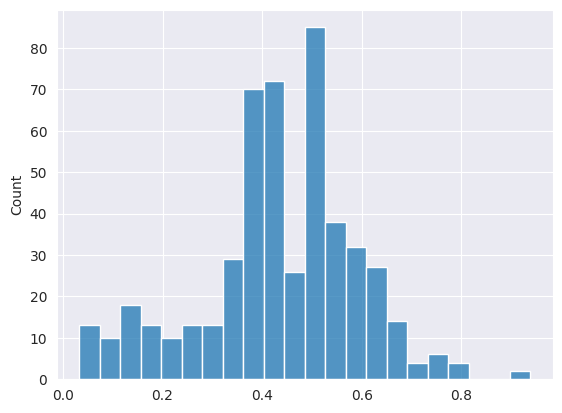

In [ ]:
#I used seaborn in a class and enjoyed it:
import seaborn as sea
sea.set_style('darkgrid')
sea.histplot(data=l)

For a more representative test, we require a pairwise comparison of every sequence (with every other sequence).

In [ ]:
#For a pairwise comparison of *every* sequence:
l = []
for n in range(0, len(o_seqs)):
  for m in range(0, len(o_seqs)):
    try: #A few of the pairs return a 'math domain error'
      l.append(float(tamura_nei(o_seqs[n],o_seqs[m])[2]))
    except:
      pass
print('head:', l[0:5])
print('number of pairs:',len(l))
print('mean +/- stdev:', stat.mean(l), '+/-', stat.stdev(l))

head: [0.0, 0.536284, 0.495175, 0.0347229, 0.564295]
number of pairs: 249994
mean +/- stdev: 0.4718198465459171 +/- 0.13031145020222554


<Axes: ylabel='Count'>

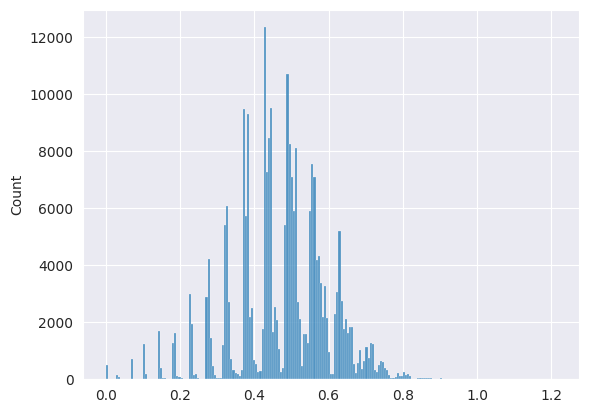

In [ ]:
sea.set_style('darkgrid')
sea.histplot(data=l)

As expected, it is something like a left-skewed distribution. My expectation, then, is that individual sequences will not differ greatly by the sum of the Tamura-Nei scores of their connections, because they all have a large number of moderate-stregnth connections. Two possible solutions:

a. Deploy a cut-off, at the point at which sequences' activities are likely to be correlated. This could be something like the 10th percentile value for Tamura-Nei distance.

b. Deploy something like: (1 - D)**n.

This generates a value between 0 - 1, with 1 being the strongest connected.

In [ ]:
p = []
for _ in l:
  power = (1 - _)**3
  p.append(power)

print('head:', p[0:5])
print('number of pairs:',len(p))
print('mean +/- stdev:', stat.mean(p), '+/-', stat.stdev(p))

head: [1.0, 0.09971402405824571, 0.1286537832665157, 0.899406474654644, 0.08271373484302763]
number of pairs: 249994
mean +/- stdev: 0.17497192644603882 +/- 0.13357010842078712


<Axes: ylabel='Count'>

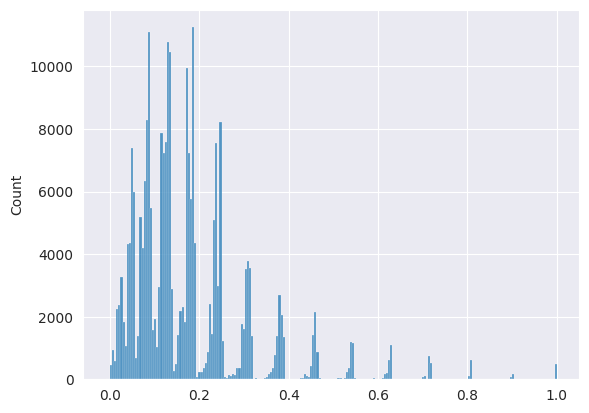

In [ ]:
sea.set_style('darkgrid')
sea.histplot(data=p)

In [ ]:
#To visualize some of these pairs:
cutoff = 0.8

for n in range(0, len(o_seqs)):
  for m in range(0, len(o_seqs)):
    try:
      data = tamura_nei(o_seqs[n],o_seqs[m])
      d = float(tamura_nei(o_seqs[n],o_seqs[m])[2])
      p = (1 - d)**3
      if p >= cutoff and p != 1.0: # p = 1 indicates a self-match.
        print(data[0])
        print(data[1])
        print('Tamura-Nei:',data[2])
        print('Connection-Stregnth', p)
        print()
    except:
      pass

AACCGGTTUAAAUAAUUUACGUUTTGGCCAA
AACCGGTTCAAAUAAUUUACGUUTTGGCCAA
Tamura-Nei: 0.0347229
Connection-Stregnth 0.899406474654644

AACCGGTTUAAAUAAUUUACGUUTTGGCCAA
AACCGGTTUAAAUAAUUUACGGCTTGGCCAA
Tamura-Nei: 0.069116
Connection-Stregnth 0.8066528957530472

AACCGGTTUAAAUAAUUUACGUUTTGGCCAA
AACCGGTTUAAUUAAUUUACGUATTGGCCAA
Tamura-Nei: 0.0680378
Connection-Stregnth 0.8094590700333826

AACCGGTTUAAAUAAUUUACGUUTTGGCCAA
AACCGGTTUAAUUAAUUUACGUGTTGGCCAA
Tamura-Nei: 0.0680147
Connection-Stregnth 0.8095192622857845

AACCGGTTAAUUAAUUUACGUGGTTGGCCAA
AACCGGTTCAUUAAUUUACGUGUTTGGCCAA
Tamura-Nei: 0.0679575
Connection-Stregnth 0.8096683226103517

AACCGGTTCAAAUAAUUUACGUUTTGGCCAA
AACCGGTTUAAAUAAUUUACGUUTTGGCCAA
Tamura-Nei: 0.0347229
Connection-Stregnth 0.899406474654644

AACCGGTTCUGUAAUUUACGUGGTTGGCCAA
AACCGGTTAUGUAAUUUACGUGUTTGGCCAA
Tamura-Nei: 0.0679472
Connection-Stregnth 0.8096951658365479

AACCGGTTAGUAAAUUUAAUCGUTTGGCCAA
AACCGGTTAGUUAAUUAAAUCGUTTGGCCAA
Tamura-Nei: 0.0679898
Connection-Stregnth 0.8095841481852

**Verdict: Success! The procedure above generates a large number of pairs of sequences which are not "the same", but really, they're close enough. This I think is an important revelation. Though the likelihood of Apta-MCTS generating the same sequence seems to be quite low, it does seem to generate sequences which are "near misses" quite often.**

An idea: I keep thinking of 'k-nearest neighbours'. We're looking for an iterative algorithm which essentially discards sequences which are similar to other sequences in the pool (Read: Not exact duplicates, but close.)

So, perhaps for each sequence, we calculate it's number of "neighbours", within the Tamura-Nei cutoff of 0.1. For a sequence with n neighbours, say 15, we know that it's somewhat redundant.

So: If the sequence has n neighbours, and has the lowest APIS score in its "neighbourhood", we can axe it. Will then need to recalculate, because clearly many sequences will have lost a neighbour. Iterate by n until all the remaining sequences have no neighbours. These are your "unique" candidates.

### Clustering!

What we now have are pairwise interaction scores for each pair of aptamers in the set.
We’d like to get into clustering based on pairwise scores, and ideally selecting the aptamer in the cluster with the highest API score.

Thinking about clustering as I remember working with high-dimensional eg. RNAseq data, the general idea is to calculate pairwise distances in a high-dimensional "Euclidean" space, using the individual columns as dimensions.

These Tamura-Nei distances are essentially high-dimensional! The distance between a pair of nucleotide strings is calculated from the individual distances of the bases in each position. So, think of a 15 base sequence as being 15-dimensional.

So, we would cluster by replacing the "raw" input with the distance matrix.

Dr. Bell recommends:

1. Spectral
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

2. dbScan
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

3. Agglomerative
(scipy.heirarchy.cluster)

#### Agglomerative:

It asks for a distance matrix, and so I'll need to reformat my pairs as such. The good news is that they're already ordered implicitly. It requires a few tweaks to the pairwise code, to convert a list into a matrix.

In [ ]:
#For a pairwise comparison of *every* sequence:
dist_mat_tn = []
for n in range(0, len(o_seqs)):
  row = []
  for m in range(0, len(o_seqs)):
    try: #A few of the pairs return a 'math domain error'
      row.append(float(tamura_nei(o_seqs[n],o_seqs[m])[2]))
    except:
      print('Math_error', o_seqs[n],o_seqs[m])
      row.append(1.0)             #Impute the maximum distance.
  dist_mat_tn.append(row)

Math_error AACCGGTTAAGUGUGGUUUAUGATTGGCCAA AACCGGTTGGAAUUAAAUCGUAGTTGGCCAA
Math_error AACCGGTTAAGUGUUAAGGCUGGTTGGCCAA AACCGGTTGGACAGCCGAAGAAUTTGGCCAA
Math_error AACCGGTTGAUUAUAUUUAAAAATTGGCCAA AACCGGTTAGAUGUGGUUGUGGGTTGGCCAA
Math_error AACCGGTTGGAAUUAAAUCGUAGTTGGCCAA AACCGGTTAAGUGUGGUUUAUGATTGGCCAA
Math_error AACCGGTTGGACAGCCGAAGAAUTTGGCCAA AACCGGTTAAGUGUUAAGGCUGGTTGGCCAA
Math_error AACCGGTTAGAUGUGGUUGUGGGTTGGCCAA AACCGGTTGAUUAUAUUUAAAAATTGGCCAA


In [ ]:
print('dimensions:', len(dist_mat_tn),'x',len(dist_mat_tn[1]))

dimensions: 500 x 500


In [ ]:
#Finally to check:
for n in range(0, len(dist_mat_tn)):
  print(dist_mat_tn[n][n])

Should be an unbroken string of zeros(these are the diagonals). I realized that I needed to impute the error sequences further up, or they would cause a few of the rows to be short. From what I can tell, the errors are caused by sequence pairs which seem to have very little in common, hence my confidence in imputing '1.0'.

For a nice visual, I'll feed this into a confusion matrix. Unfortunately... It disconnects my runtime.

In [ ]:
import plotly.figure_factory as ff

z = dist_mat_tn

# change each element of z to type string for annotations
z_text = [[str(y) for y in x] for x in z]

# set up figure
fig = ff.create_annotated_heatmap(z, annotation_text=z_text, colorscale='Viridis')

# add title
fig.update_layout(title_text='<i><b>Confusion matrix</b></i>')

# adjust margins to make room for the y-axis title
fig.update_layout(margin=dict(t=50, l=200))

# add colorbar
fig['data'][0]['showscale'] = True
fig.show()


In [ ]:
fig.show()

In [ ]:
distance_matrix = dist_mat_tn

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
#From StackExchange
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

Saving dendrogram_file.txt to dendrogram_file.txt


In [ ]:
dendrogram_file = 'scipy_dendrogram_file.pdf'

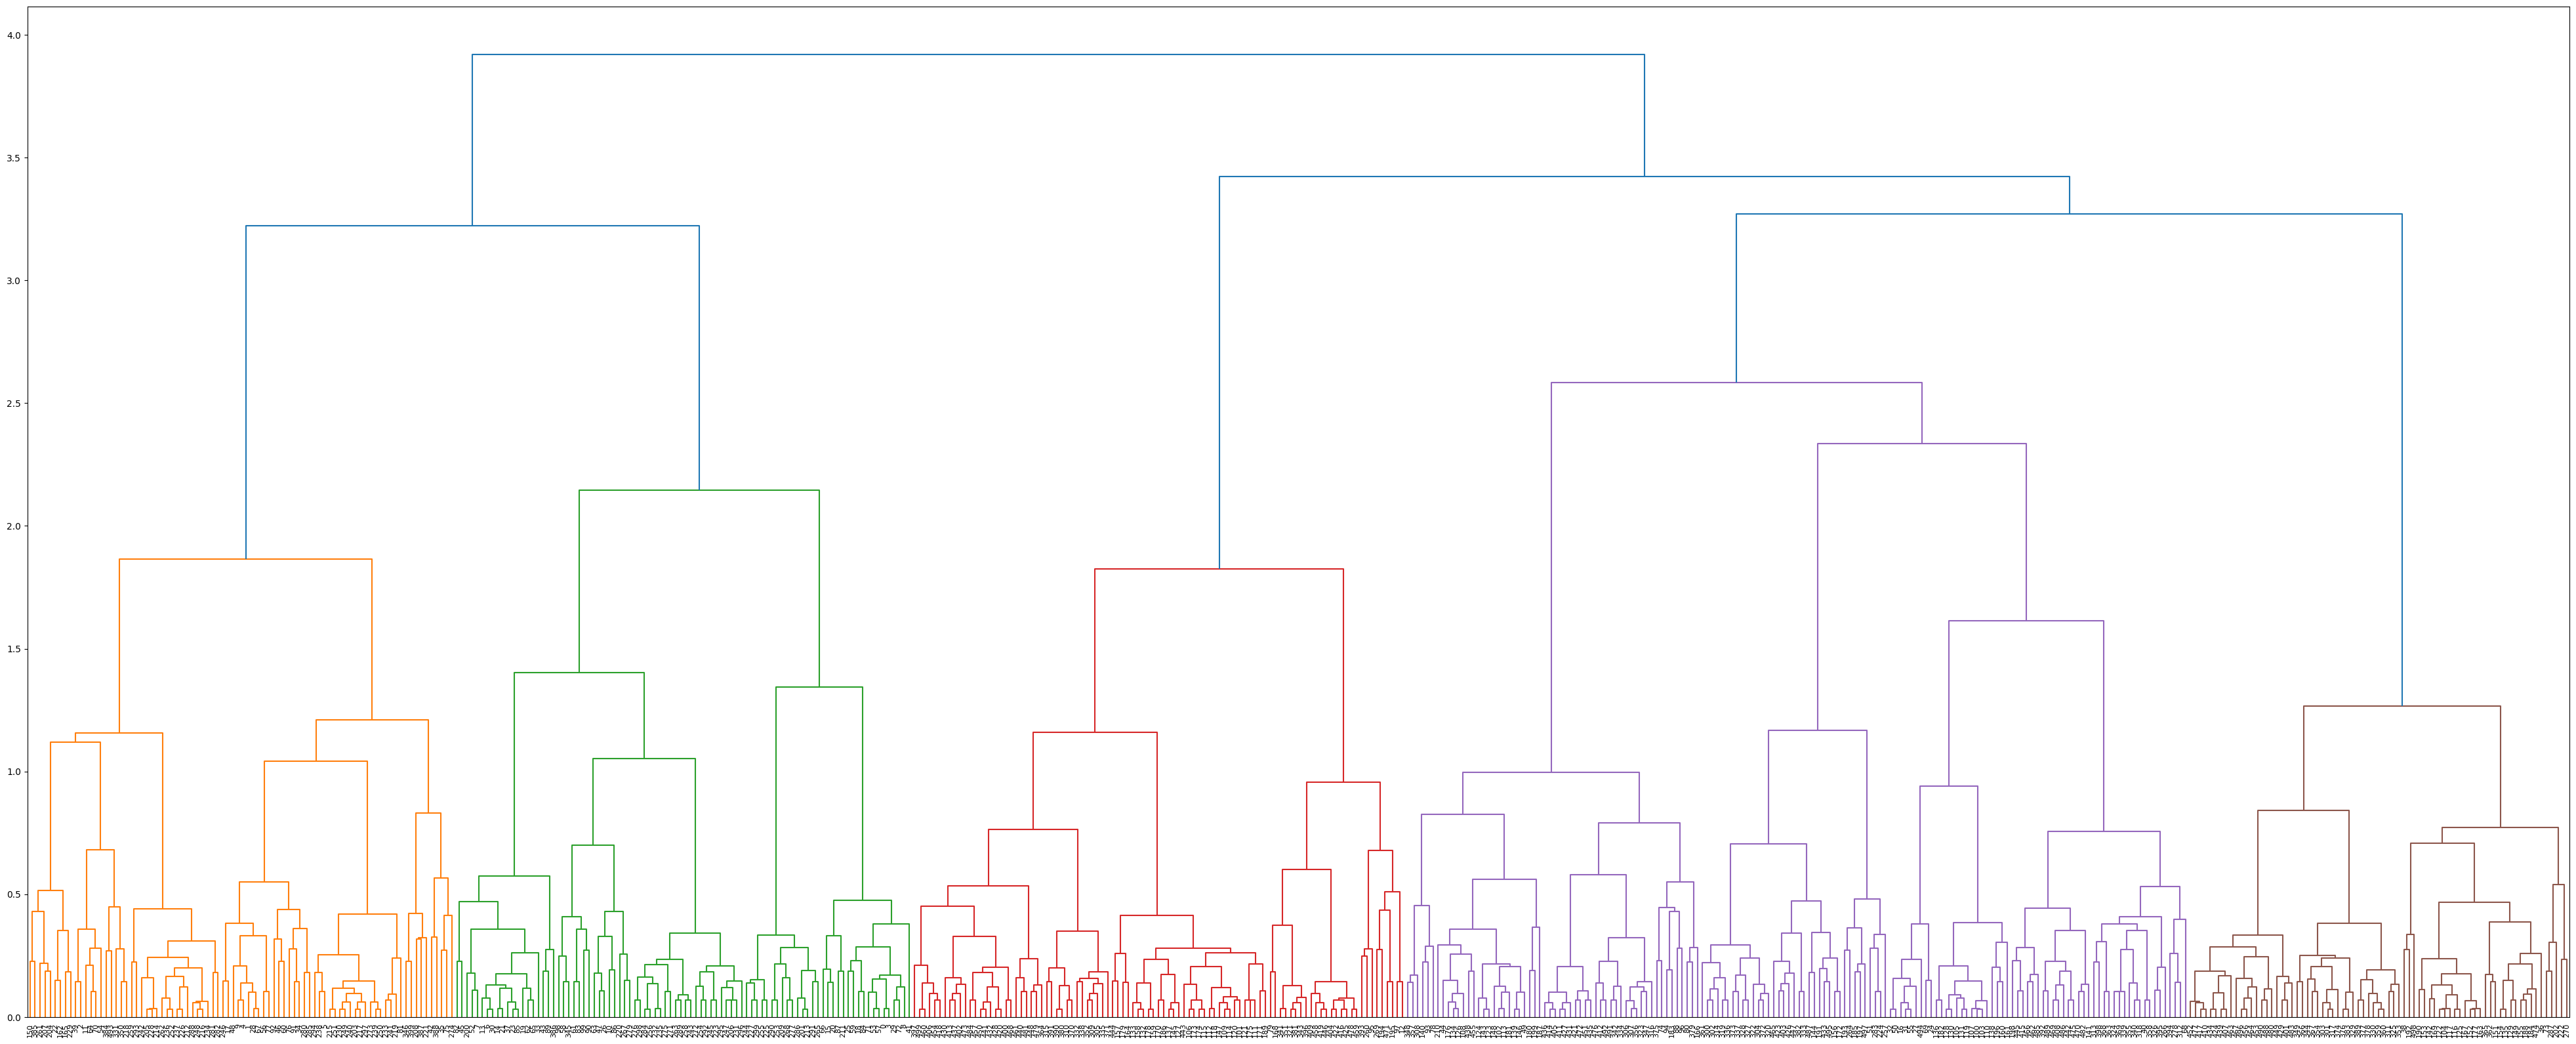

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

from scipy.spatial.distance import squareform

Z = linkage(squareform(distance_matrix), 'ward', optimal_ordering=True)

fig = plt.figure(figsize=(50,20))

dn = dendrogram(Z)

ax = plt.gca()

ax.tick_params(axis='x', which='major', labelsize=8)

plt.savefig(dendrogram_file,dpi=300)

plt.show()

plt.close()

**In the next notebook, I improve on these clustering results to make them more interpretable.**